In [44]:
import gzip
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split




import automl
from automl import init

ModuleNotFoundError: No module named 'automl'

Load the census income dataset


In [2]:
dataset = fetch_openml(name='adult',as_frame=True)
df,y =dataset.data,dataset.target

c:\Users\kimu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name adult exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\kimu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Lets take a look at the data

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba


In [4]:
df.dtypes

age               category
workclass         category
fnlwgt             float64
education         category
education-num      float64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capitalgain       category
capitalloss       category
hoursperweek      category
native-country    category
dtype: object

The data as you can see has alot of strings and also numerical data 

In [9]:
pd.DataFrame({'% missing values': df.isnull().sum() * 100/len(df)}).T

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
% missing values,0.0,5.730724,0.0,0.0,0.0,0.0,5.751198,0.0,0.0,0.0,0.0,0.0,0.0,1.754637


Let us now visualize the target variable


[Text(0, 0, '37155'), Text(0, 0, '11687')]

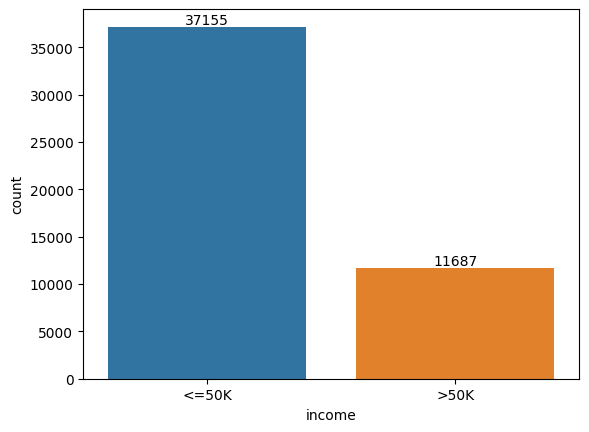

In [13]:
y_df = pd.DataFrame(y)
y_df.columns = ['income']

ax = sns.countplot(x="income", data=y_df)
ax.bar_label(ax.containers[0])

Next step would be to seperate the predictions from the training for both the train and the test datasets


In [27]:
# Several of the columns are incorrectly labeled as category type in the original dataset
numeric_columns = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']
for col in df.columns:
    if col in numeric_columns:
        df[col] = df[col].astype(int)
    

X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y.map({'>50K': 1, '<=50K': 0}).astype(int),
                                                    train_size=0.7,
                                                    random_state=0)

X_train.shape, X_test.shape

C:\Users\TEMP.DESKTOP-JQDH0K7\AppData\Local\Temp\ipykernel_24376\3546030452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)
C:\Users\TEMP.DESKTOP-JQDH0K7\AppData\Local\Temp\ipykernel_24376\3546030452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)
C:\Users\TEMP.DESKTOP-JQDH0K7\AppData\Local\Temp\ipykernel_24376\3546030452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

((34189, 14), (14653, 14))

AUTOML
Create an instance of Oracle Automlx
Automlx consists of 5 modules preprocessing.algorithm selection,feature selection,Adaptive sampling and hyperparameter tuning

In [ ]:
est1 = automl.Pipeline(task='classification')
est1.fit(X_train,y_train)

A model is then genetated (est1) and can be used for prediction tasks .We use the roc_auc_score metric to evaluate the perfomance of the model on unseen data

In [ ]:
y_proba = est1.predict_proba(X_test)
score_default = roc_auc_score(y_test,y_proba[:,1])

print(f 'Score on test data: {score_default}')

Analyze the AutoML optimization process

Information about the training
Selected features that Automl found to be the most predictive in the training data
Selected algorithm that was the best choice for this data
Selected hyperparameters for the selected algorithm

AutoMl provides a print_summary API to output the different trials perfomed

In [ ]:
est1.print_summary()

Algorithm Selection

The plot shows the average scores across all the algorithms .Here we are able to see that the LGBM classifier achieved the highest prediction score 

In [ ]:
# Each trial is a tuple of
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
# all CV scores, total CV time (s), memory usage (Gb))
trials = est1.model_selection_trials_
colors = []
scores = [x[3] for x in trials]
models = [x[0] for x in trials]
y_margin = 0.10 * (max(scores) - min(scores))
s = pd.Series(scores, index=models).sort_values(ascending=False)

for f in s.keys():
    if f == '{}_AS'.format(est1.selected_model_):
        colors.append('orange')
    elif s[f] >= s.mean():
        colors.append('teal')
    else:
        colors.append('turquoise')
        

fig, ax = plt.subplots(1)
ax.set_title("Algorithm Selection Trials")
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)
ax.set_ylabel(est1.inferred_score_metric[0])
s.plot.bar(ax=ax, color=colors, edgecolor='black')
ax.axhline(y=s.mean(), color='black', linewidth=0.5)
plt.show()

After algorithm selection,adaptive sampling aims to find the smallest dataset sample that can be created without compromising the validation set score'

In [ ]:
# Each trial is a tuple of
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
# all CV scores, total CV time (s), memory usage (Gb))
trials = est1.adaptive_sampling_trials_
scores = [x[3] for x in trials]
n_samples = [x[1] for x in trials]
y_margin = 0.10 * (max(scores) - min(scores))

fig, ax = plt.subplots(1)
ax.set_title("Adaptive Sampling ({})".format(trials[0][0]))
ax.set_xlabel('Dataset sample size')
ax.set_ylabel(est1.inferred_score_metric[0])
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)
ax.plot(n_samples, scores, 'k:', marker="s", color='teal', markersize=3)
plt.show()

The next step is to find a relevant feature subset to maximize score for the chosen algorithm.Automlx feature seleaction uses an intelligent search strategy looking for various possible feature rankings and substes

In [ ]:
print(f"Features selected: {est1.selected_features_names_.to_list()}")
dropped_features = est1.pipeline.preprocessor.transformed_col_names.drop(est1.selected_features_names_)
print(f"Features dropped: {dropped_features.to_list()}")

# Each trial is a tuple of
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
# all CV scores, total CV time (s), memory usage (Gb))
trials = est1.feature_selection_trials_
scores = [x[3] for x in trials]
n_features = [x[2] for x in trials]
y_margin = 0.10 * (max(scores) - min(scores))


fig, ax = plt.subplots(1)
ax.set_title("Feature Selection Trials")
ax.set_xlabel("Number of Features")
ax.set_ylabel(est1.inferred_score_metric[0])
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)
ax.plot(n_features, scores, 'k:', marker="s", color='teal', markersize=3)
ax.axvline(x=len(est1.selected_features_names_), color='orange', linewidth=2.0)
plt.show()

Hyperparameter tuning 
Hyperparameter tuning is the last stage of the AutoML pipeline and focuses on improving the chosen algorithm score .We use a novell algorithm to search across many hyperparameters 

In [ ]:
# Each trial is a tuple of
# (algorithm, no. samples, no. features, mean CV score, hyperparameters, 
# all CV scores, total CV time (s), memory usage (Gb))
trials = est1.tuning_trials_
scores = [x[3] for x in reversed(trials)]
y_margin = 0.10 * (max(scores) - min(scores))


fig, ax = plt.subplots(1)
ax.set_title("Hyperparameter Tuning Trials")
ax.set_xlabel("Iteration $n$")
ax.set_ylabel(est1.inferred_score_metric[0])
ax.grid(color='g', linestyle='-', linewidth=0.1)
ax.set_ylim(min(scores) - y_margin, max(scores) + y_margin)
ax.plot(range(1, len(trials) + 1), scores, 'k:', marker="s", color='teal', markersize=3)
plt.show()

Confusion matrix
We use a confusin matrix to visualize perfomance

In [ ]:
y_pred = est1.predict(X_test)
cm = confusion_matrix(y_test.astype(int), y_pred, labels=[False, True])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(cm)
df_cm = df_cm * 100

ax = sns.heatmap(df_cm, annot=True, fmt='.2f', cbar=False, 
                 xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

est2 = automl.Pipeline(model_list=['LogisticRegression'])
est2.fit(X_train, y_train)
y_proba = est2.predict_proba(X_test)
score_modellist = roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC Score on test data : {score_modellist}')

Use a custom validation that you want to see the AutoML use to evaluate the models

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=0)

est3 = automl.Pipeline()
est3.fit(X_train, y_train, X_val, y_val)

y_proba = est3.predict_proba(X_test)
score_valset = roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC Score on test data : {score_valset}')

Increase the number of tuned models
We can optimize the parameters for the top n models.Here we will tell the pipeline to tune the hyper-parameters of the best 2 models

In [ ]:
est4 = automl.Pipeline(n_algos_tuned=2, model_list=['GaussianNB', 'LogisticRegression', 'DecisionTreeClassifier'])
est4.fit(X_train, y_train)

y_proba = est4.predict_proba(X_test)
score_modellist = roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC Score on test data : {score_modellist}')

In [ ]:
est5 = automl.Pipeline(score_metric='accuracy', model_list=['LogisticRegression'])
est5.fit(X_train, y_train)

y_proba = est5.predict_proba(X_test)
score_scoringstr = roc_auc_score(y_test, y_proba[:, 1])

print(f'AUC ROC Score on test data : {score_scoringstr}')

Define a metric for the score

In [ ]:
# Define the scoring function
score_fn = make_scorer(f1_score, greater_is_better=True, needs_proba=False, average='macro')

est6 = automl.Pipeline(score_metric=score_fn, model_list=['LogisticRegression'])
est6.fit(X_train, y_train)

y_proba = est6.predict_proba(X_test)
score_scoringsfn = roc_auc_score(y_test, y_proba[:, 1])

print(f'AUC ROC Score on test data : {score_scoringsfn}')

Specify a time budget for the AUTOML

In [ ]:
est7 = automl.Pipeline()
est7.fit(X_train, y_train, time_budget=10)

y_proba = est5.predict_proba(X_test)
score_timebudget = roc_auc_score(y_test, y_proba[:, 1])

print(f'AUC ROC Score on test data : {score_timebudget}')

Machine learning explainability
Someone may wish to know why a model outputs that specific prediction,or the data features that are relevant to the prediction.

In [ ]:
explainer = automl.MLExplainer(est1,
                               X_train,
                               y_train,
                               target_names=["<=50K", ">50K"],
                               task="classification")